### 1. Importación de Librerias

In [ ]:
#Importación de librerías Requeridas
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
from sklearn import metrics
from sklearn.model_selection import cross_val_score
import numpy as np
import sys
import tensorflow as tf
import time
from sklearn.preprocessing import OneHotEncoder
import tensorflow as tf
from sklearn.preprocessing import OneHotEncoder
from sklearn.utils import class_weight
from sklearn.model_selection import train_test_split

### 2. Lectura del data frame

In [2]:
file_path = 'banklimpio.csv'
df = pd.read_csv(file_path, sep=',')
df.shape

(77019, 84)

In [ ]:
df
shap

,periodo,punt_ingles,punt_matematicas,punt_sociales_ciudadanas,punt_c_naturales,punt_lectura_critica,punt_global,estu_edad,cole_area_ubicacion_URBANO,cole_bilingue_N,...,fami_personashogar_Tres,fami_personashogar_Una,fami_tieneautomovil_No,fami_tieneautomovil_Si,fami_tienecomputador_No,fami_tienecomputador_Si,fami_tieneinternet_No,fami_tieneinternet_Si,fami_tienelavadora_No,fami_tienelavadora_Si
0,20224,48.0,58.0,45.0,50.0,42.0,243.0,19,1,1,...,0,0,0,0,0,0,0,0,0,0
1,20224,52.0,47.0,33.0,43.0,53.0,223.0,20,1,1,...,0,0,1,0,0,1,0,1,0,1
2,20224,62.0,68.0,66.0,61.0,61.0,319.0,20,1,1,...,0,0,1,0,1,0,0,1,0,1
3,20224,58.0,44.0,37.0,45.0,45.0,220.0,19,1,1,...,0,0,1,0,1,0,1,0,1,0
4,20224,72.0,70.0,66.0,65.0,60.0,329.0,18,1,1,...,0,0,1,0,0,1,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77014,20142,48.0,52.0,45.0,50.0,57.0,254.0,26,1,1,...,0,0,1,0,1,0,1,0,1,0
77015,20142,52.0,62.0,52.0,51.0,65.0,285.0,25,1,1,...,1,0,1,0,1,0,0,1,1,0
77016,20172,38.0,42.0,29.0,44.0,32.0,184.0,25,1,1,...,0,0,1,0,0,1,0,1,0,1
77017,20194,37.0,41.0,32.0,40.0,46.0,198.0,24,1,1,...,0,0,1,0,1,0,1,0,1,0


### 3. Separación de los datos de entrenamiento y prueba

In [4]:
X = df.drop(columns=['punt_global'])  #Variables predictivas
y = df['punt_global']  #Variables a predecir

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 100)

### 4. Modelo

#### Modelo con 10 capas: 1 de normalización, 1 de salida, 8 capas ocultas con 64  neuronas cada una

In [12]:
tf.keras.layers.Normalization
norm = tf.keras.layers.Normalization()
norm.adapt(np.array(X_train))
X_train[:1]

M1 = tf.keras.Sequential([
    norm,
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1)
  ])

M1.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.0001))

history = M1.fit(
  X_train,
  y_train,
  validation_split=0.2,
  epochs=100)

Epoch 1/100
1541/1541 ━━━━━━━━━━━━━━━━━━━━ 25s 3ms/step - loss: 106.4741 - val_loss: 13.2966
Epoch 2/100
1541/1541 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 11.9755 - val_loss: 9.3716
Epoch 3/100
1541/1541 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 8.7381 - val_loss: 7.9542
Epoch 4/100
1541/1541 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 7.2455 - val_loss: 6.4377
Epoch 5/100
1541/1541 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 6.0956 - val_loss: 5.7587
Epoch 6/100
1541/1541 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 5.3948 - val_loss: 5.3518
Epoch 7/100
1541/1541 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 4.6622 - val_loss: 4.5963
Epoch 8/100
1541/1541 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 4.4282 - val_loss: 4.2224
Epoch 9/100
1541/1541 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 3.9571 - val_loss: 3.9733
Epoch 10/100
1541/1541 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 3.6339 - val_loss: 3.6254
Epoch 11/100
1541/1541 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 3.3796 - val_loss: 3.5112
Epoch 12/100
1

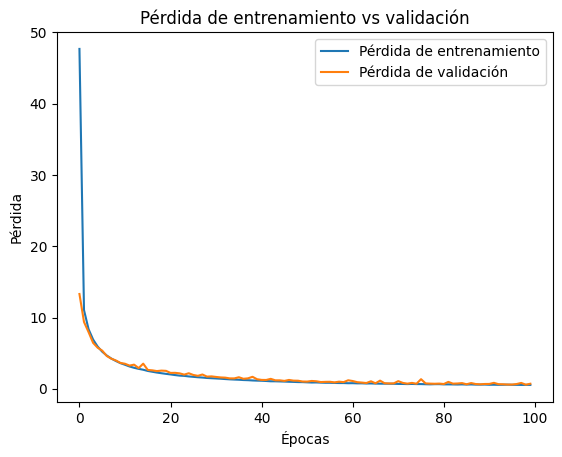

In [13]:
# Graficar la pérdida de entrenamiento y validación
plt.plot(history.history['loss'], label='Pérdida de entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida de validación')
plt.title('Pérdida de entrenamiento vs validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.show()


#### Modelo con 7 capas: 1 de normalización, 1 de salida, 5 capas ocultas con 64  neuronas cada una

In [14]:
tf.keras.layers.Normalization
norm = tf.keras.layers.Normalization()
norm.adapt(np.array(X_train))
X_train[:1]

M2 = tf.keras.Sequential([
    norm,
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1)
  ])

M2.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.0001))

history = M2.fit(
  X_train,
  y_train,
  validation_split=0.2,
  epochs=100)

Epoch 1/100
1541/1541 ━━━━━━━━━━━━━━━━━━━━ 16s 3ms/step - loss: 126.4178 - val_loss: 14.6353
Epoch 2/100
1541/1541 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 13.5674 - val_loss: 10.7447
Epoch 3/100
1541/1541 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 9.8746 - val_loss: 8.6179
Epoch 4/100
1541/1541 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 8.2240 - val_loss: 7.3477
Epoch 5/100
1541/1541 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 7.1782 - val_loss: 6.5211
Epoch 6/100
1541/1541 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 6.2955 - val_loss: 6.3276
Epoch 7/100
1541/1541 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 5.6320 - val_loss: 5.3369
Epoch 8/100
1541/1541 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 5.0896 - val_loss: 4.9735
Epoch 9/100
1541/1541 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 4.7164 - val_loss: 4.6323
Epoch 10/100
1541/1541 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 4.4221 - val_loss: 4.3556
Epoch 11/100
1541/1541 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 4.0972 - val_loss: 4.1538
Epoch 12/100


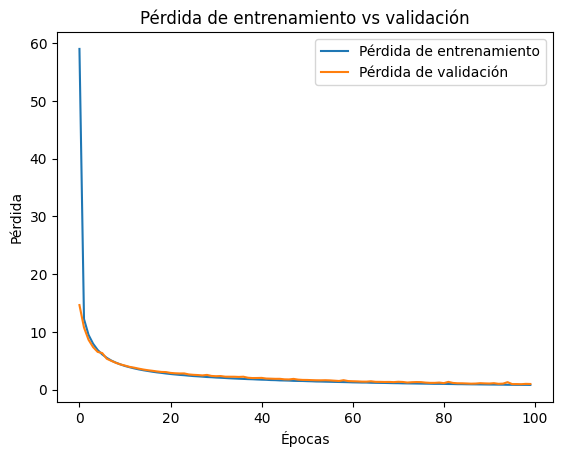

In [15]:
# Graficar la pérdida de entrenamiento y validación
plt.plot(history.history['loss'], label='Pérdida de entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida de validación')
plt.title('Pérdida de entrenamiento vs validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.show()

#### Modelo con 5 capas: 1 de normalización, 1 de salida, 3 capas ocultas con 64  neuronas cada una

In [16]:
tf.keras.layers.Normalization
norm = tf.keras.layers.Normalization()
norm.adapt(np.array(X_train))
X_train[:1]

M3 = tf.keras.Sequential([
    norm,
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1)
  ])

M3.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.0001))

history = M3.fit(
  X_train,
  y_train,
  validation_split=0.2,
  epochs=100)

Epoch 1/100
1541/1541 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - loss: 168.2178 - val_loss: 17.0326
Epoch 2/100
1541/1541 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 15.3444 - val_loss: 11.6647
Epoch 3/100
1541/1541 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 11.0997 - val_loss: 9.6842
Epoch 4/100
1541/1541 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 9.2531 - val_loss: 8.5549
Epoch 5/100
1541/1541 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 8.0305 - val_loss: 7.6684
Epoch 6/100
1541/1541 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 7.2874 - val_loss: 7.0800
Epoch 7/100
1541/1541 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 6.6359 - val_loss: 6.6258
Epoch 8/100
1541/1541 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 6.2704 - val_loss: 6.2806
Epoch 9/100
1541/1541 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 5.9156 - val_loss: 6.0061
Epoch 10/100
1541/1541 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 5.6108 - val_loss: 5.7479
Epoch 11/100
1541/1541 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 5.3584 - val_loss: 5.6009
Epoch 12/100


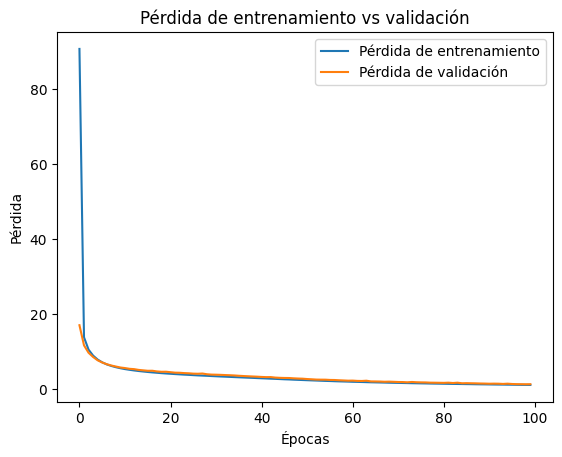

In [17]:
# Graficar la pérdida de entrenamiento y validación
plt.plot(history.history['loss'], label='Pérdida de entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida de validación')
plt.title('Pérdida de entrenamiento vs validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.show()

#### Modelo con 3 capas: 1 de normalización, 1 de salida, 1 capas ocultas con 64  neuronas cada una

In [18]:
tf.keras.layers.Normalization
norm = tf.keras.layers.Normalization()
norm.adapt(np.array(X_train))
X_train[:1]

M4 = tf.keras.Sequential([
    norm,
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1)
  ])

M4.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.0001))

history = M4.fit(
  X_train,
  y_train,
  validation_split=0.2,
  epochs=100)

Epoch 1/100
1541/1541 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 241.8358 - val_loss: 232.7288
Epoch 2/100
1541/1541 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 228.0283 - val_loss: 208.3446
Epoch 3/100
1541/1541 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 199.3907 - val_loss: 168.6074
Epoch 4/100
1541/1541 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 156.8106 - val_loss: 123.0884
Epoch 5/100
1541/1541 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 112.2579 - val_loss: 85.3869
Epoch 6/100
1541/1541 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 80.8469 - val_loss: 67.3357
Epoch 7/100
1541/1541 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 63.7619 - val_loss: 54.3742
Epoch 8/100
1541/1541 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 51.9240 - val_loss: 45.3619
Epoch 9/100
1541/1541 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 43.2480 - val_loss: 38.7182
Epoch 10/100
1541/1541 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 36.9765 - val_loss: 33.3150
Epoch 11/100
1541/1541 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 31.5972 - val_lo

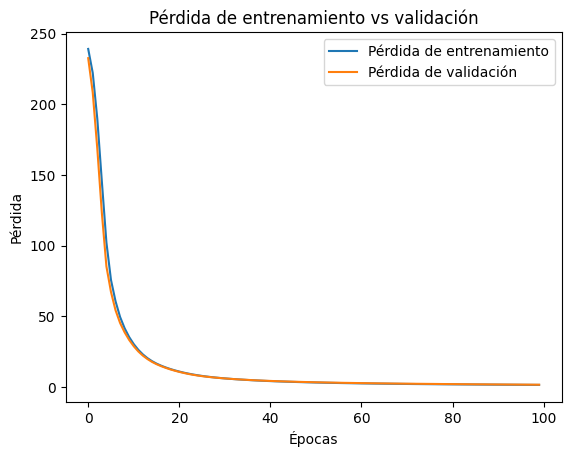

In [19]:
# Graficar la pérdida de entrenamiento y validación
plt.plot(history.history['loss'], label='Pérdida de entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida de validación')
plt.title('Pérdida de entrenamiento vs validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.show()

#### Modelo con 3 capas: 1 de normalización, 1 de salida, 1 capas ocultas con 64  neuronas cada una

In [20]:
tf.keras.layers.Normalization
norm = tf.keras.layers.Normalization()
norm.adapt(np.array(X_train))
X_train[:1]

M5 = tf.keras.Sequential([
    norm,
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1)
  ])

M5.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.0001))

history = M5.fit(
  X_train,
  y_train,
  validation_split=0.2,
  epochs=100)

Epoch 1/100
1541/1541 ━━━━━━━━━━━━━━━━━━━━ 23s 6ms/step - loss: 91.9644 - val_loss: 10.2247
Epoch 2/100
1541/1541 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 8.7197 - val_loss: 6.9761
Epoch 3/100
1541/1541 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 6.3025 - val_loss: 5.4847
Epoch 4/100
1541/1541 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - loss: 5.0460 - val_loss: 4.8172
Epoch 5/100
1541/1541 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - loss: 4.3891 - val_loss: 4.2264
Epoch 6/100
1541/1541 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 3.8926 - val_loss: 3.8776
Epoch 7/100
1541/1541 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - loss: 3.4857 - val_loss: 3.9301
Epoch 8/100
1541/1541 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - loss: 3.3040 - val_loss: 3.6569
Epoch 9/100
1541/1541 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - loss: 3.1008 - val_loss: 3.2306
Epoch 10/100
1541/1541 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 2.9448 - val_loss: 3.0750
Epoch 11/100
1541/1541 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 2.7775 - val_loss: 2.9751
Epoch 12/100
1

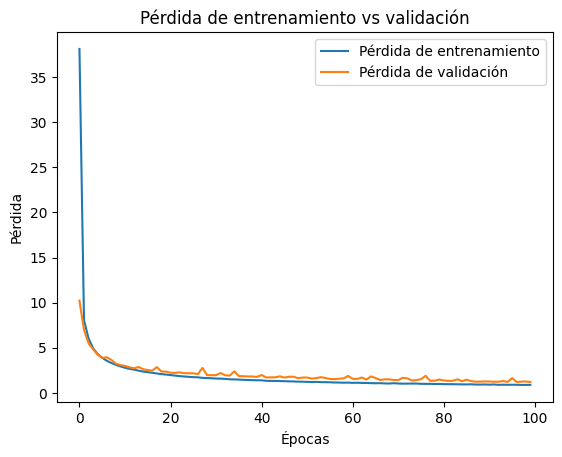

In [21]:
# Graficar la pérdida de entrenamiento y validación
plt.plot(history.history['loss'], label='Pérdida de entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida de validación')
plt.title('Pérdida de entrenamiento vs validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.show()

In [22]:
tf.keras.layers.Normalization
norm = tf.keras.layers.Normalization()
norm.adapt(np.array(X_train))
X_train[:1]

M5 = tf.keras.Sequential([
    norm,
    tf.keras.layers.Dense(80, activation='relu'),
    tf.keras.layers.Dense(80, activation='relu'),
    tf.keras.layers.Dense(80, activation='relu'),
    tf.keras.layers.Dense(80, activation='relu'),
    tf.keras.layers.Dense(80, activation='relu'),
    tf.keras.layers.Dense(1)
  ])


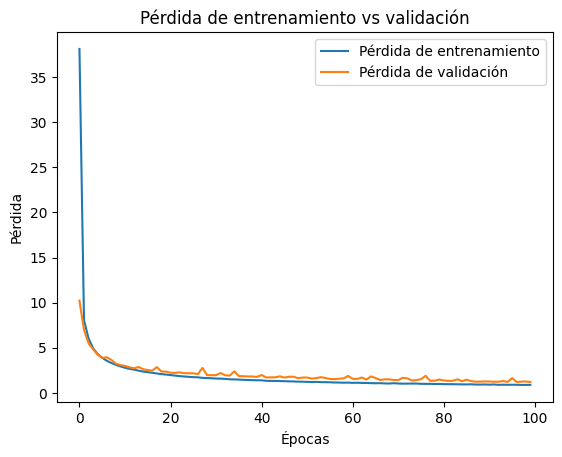

In [23]:
# Graficar la pérdida de entrenamiento y validación
plt.plot(history.history['loss'], label='Pérdida de entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida de validación')
plt.title('Pérdida de entrenamiento vs validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.show()

In [24]:
tf.keras.layers.Normalization
norm = tf.keras.layers.Normalization()
norm.adapt(np.array(X_train))
X_train[:1]

M5 = tf.keras.Sequential([
    norm,
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(1)
  ])


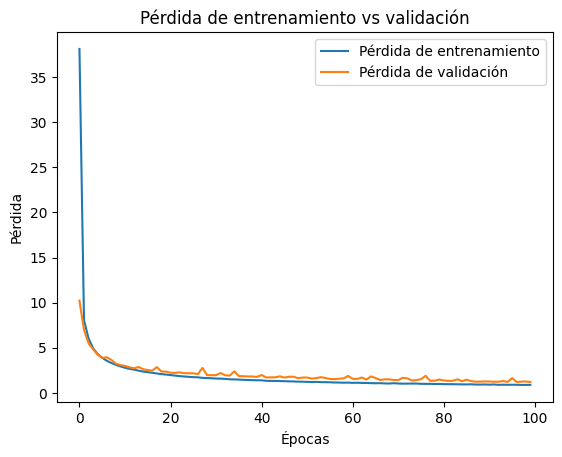

In [25]:
# Graficar la pérdida de entrenamiento y validación
plt.plot(history.history['loss'], label='Pérdida de entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida de validación')
plt.title('Pérdida de entrenamiento vs validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.show()